# Tutorial 03: Solving for Rosenbrock function

In [2]:
# After you successfully install the package and activate a conda environment
from optimizer.gradient_free import NelderMeadSimplex
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Rosenbrock():

    # initialize an instance of Rosenbrock class
    def __init__(self, x_ranges, y_ranges):

        self.x_limit = np.arange(x_ranges[0],x_ranges[1],x_ranges[-1])

        self.y_limit = np.arange(y_ranges[0],y_ranges[1],y_ranges[-1])

        self.z_mat = np.zeros((self.x_limit.size, self.y_limit.size))

        counter_x = 0

        for x in self.x_limit:

            counter_y = 0

            for y in self.y_limit:

                self.z_mat[counter_x, counter_y] = np.log10(self.compute_z(np.array([x, y])))

                counter_y += 1

            counter_x += 1

        return None

    def visualize(self):

        plt.xlabel("x")

        plt.ylabel("y")

        plt.contour(self.x_limit, self.y_limit, np.transpose(self.z_mat), 20)

        plt.show()

        return None

    def compute_z(self,parameters):

        sum_f_x = 0

        for i in range(0, parameters.size - 1):

            sum_f_x += ((1 - parameters[i] )**2 +
                        100*(parameters[i+1]- parameters[i]**2)**2)

        return (sum_f_x)**2

    # "update" must be here. For force-matching, rdf-matching ..., this function
    # will be used to update the best predicted properties. 
    def update(self, func_expand, best_func, status=None):

        pass

        return None 

    # method "optimize" must be here. the optimizer will assume every 
    # passed objective function will have a attribute of "optimize"
    # "para_type_lst", and "status" also must be here, though they are not used
    def optimize(self, para_type_lst, parameters, status=None):

        return self.compute_z(parameters)

In [4]:
# input file name
input_file = "in_rosenbrock"

In [5]:
# No lines skipped:
skipped_lines = 0

In [6]:
# The solution space of Rosenbrock function:
x = [-2, 2, 0.01]
y = [-2, 2, 0.01]

In [7]:
# Initialize objective function of Rosenbrock function
Rosenbrock_obj = Rosenbrock(x, y)

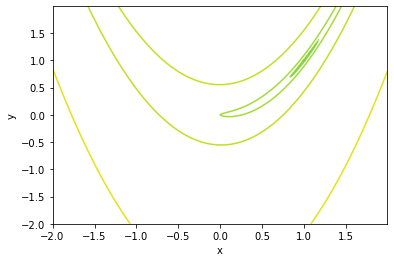

In [8]:
# Visualize the solution space of Rosenbrock
# global minimum: x = 1.0, y = 1.0 
Rosenbrock_obj.visualize() 

In [ ]:
# initialize optimizer ...
optimize_rosen = NelderMeadSimplex(input_file,
                                   Rosenbrock_obj,
                                   skipped=skipped_lines)
# Optimization starts ...
optimize_rosen.run_optimization() 

In [ ]:
# Load the solutions:
with open("best_parameters.txt") as content: 

    for line in content:

        solution = np.array(line.split()).astype(np.float64)

    x, y = solution
    print("The solution x = %.4f, y = %.4f" % (x, y))